In [41]:
from qiskit import *
import qiskit.quantum_info as qi
import numpy as np
import scipy.linalg as sci
import matplotlib.pyplot as plt

# H = ZZ

Here, the Hamiltonian's circuit is as follows (where the variable for time is a random number between 0 and 1). This is a simple case, where only two CX gates and one Rz(2t) gate are needed due to the diagonalized nature of ZZ.

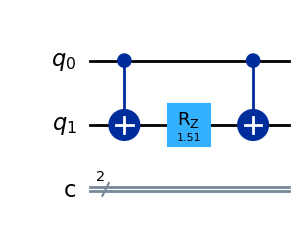

In [71]:
time = np.random.rand(1)
qc = QuantumCircuit(2,2)
qc.cx(0,1)
qc.rz(2*time[0], 1)
qc.cx(0,1)
ham_op = qi.Operator(qc)
qc.draw(output = 'mpl')

Below is the code to create Comparing this Hamiltonain to the actual one calculated using Scipys .expm function

In [72]:
def Hamiltonian1(t):
    qc = QuantumCircuit(2,2)
    qc.cx(0,1)
    qc.rz(2*t[0], 1)
    qc.cx(0,1)
    ham_op = qi.Operator(qc)
    qc.draw()
    return(ham_op.to_matrix())
print("Hamiltonian Simulation of ZZ", Hamiltonian1(time).round(5))
#calculaitng actual hamiltonian
qc2 = QuantumCircuit(2)
qc2.z(0)
qc2.z(1)
actual_zs = (qi.Operator(qc2)).to_matrix()
actual_ham = sci.expm(-1j * actual_zs * time[0])
print("Actual ZZ Hamiltonian", actual_ham.round(5))

#error calc.?

Hamiltonian Simulation of ZZ [[0.72664-0.68701j 0.     +0.j      0.     +0.j      0.     +0.j     ]
 [0.     +0.j      0.72664+0.68701j 0.     +0.j      0.     +0.j     ]
 [0.     +0.j      0.     +0.j      0.72664+0.68701j 0.     +0.j     ]
 [0.     +0.j      0.     +0.j      0.     +0.j      0.72664-0.68701j]]
Actual ZZ Hamiltonian [[0.72664-0.68701j 0.     +0.j      0.     +0.j      0.     +0.j     ]
 [0.     +0.j      0.72664+0.68701j 0.     +0.j      0.     +0.j     ]
 [0.     +0.j      0.     +0.j      0.72664+0.68701j 0.     +0.j     ]
 [0.     +0.j      0.     +0.j      0.     +0.j      0.72664-0.68701j]]


Clearly, the circuit perfectly simulates the time evolution of this hamiltonian. There is never any error for any value of t that I have tried.

# $H = \sum_{j=1}^{n-2} H_j$ where $H_j = X_jX_{j+1}X_{j+2}$

Below is the Circuit defining this hamiltonian for n=3. This case is more complex as each Hj requires a Hadamard on each qubit on top of two controls needed at both the compute and uncompute stage. The H gates are nessecary because X is not diagonal

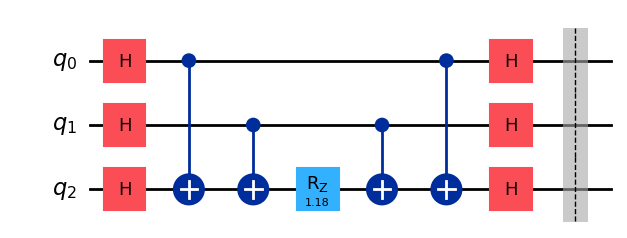

In [96]:
    time = np.random.rand(1)
    n=3
    qc = QuantumCircuit(n)
    for i in range(n-2):
        qc.h(i)
        qc.h(i+1)
        qc.h(i+2)
        qc.cx(i,i+2)
        qc.cx(i+1,i+2)
        qc.rz(2*time[0], i+2)
        qc.cx(i+1,i+2)
        qc.cx(i,i+2)
        qc.h(i)
        qc.h(i+1)
        qc.h(i+2)
        qc.barrier()
    qc.draw(output='mpl')

Below is the code to create Comparing this Hamiltonain to the actual one calculated using Scipys .expm function

In [97]:
def Hamiltonian2(t, n):
    qc = QuantumCircuit(n)
    for i in range(n-2):
        qc.h(i)
        qc.h(i+1)
        qc.h(i+2)
        qc.cx(i,i+2)
        qc.cx(i+1,i+2)
        qc.rz(2*t[0], i+2)
        qc.cx(i+1,i+2)
        qc.cx(i,i+2)
        qc.h(i)
        qc.h(i+1)
        qc.h(i+2)
    ham_op = qi.Operator(qc)
    return(ham_op.to_matrix())

n = 3
time = np.random.rand(1)
#print("Hamiltonian Simulation", Hamiltonian2(time,n).round(5))
#calculaitng actual hamiltonian
qc2 = QuantumCircuit(n)
for i in range(n-2):
    qc2.x(i)
    qc2.x(i+1)
    qc2.x(i+2)
actual_zs = (qi.Operator(qc2)).to_matrix()
actual_ham = sci.expm(-1j * actual_zs * time[0])
#print("Actual Hamiltonian", actual_ham.round(5))
print("It is easier to identify that these two are equal by calcualting their difference: \n", (actual_ham - Hamiltonian2(time,n)).round(5))
#error calc.?


It is easier to identify that these two are equal by calcualting their difference: 
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


As in case 1, clearly this circuit does a pefect job of simulating the time evolution of the Hamiltonian. There is never any error in this case.

# $H = \sum_{j=1}^{n-1} H_j$ where $H_j = g_jX_{j}Z_{j+1}$ where $g_i$ is in $\R$

Below is Our run of this circuit's Hamiltonian Simulation. There is an error associated with each run here due to the integer value g_j which, like the t values above, is a unique random value between 0-1 for each Rz application. Below I simulate 500 runs (wiht n=4 qubits) of the circuit with times ranging from 0-10 seconds and plot the mean squared error of the actual and simulated hamiltonians for each run. You can modify the n values as you wish or just run multiple times to see different MSE plots for different arrays of g values.

Text(0, 0.5, 'Mean Squared Error')

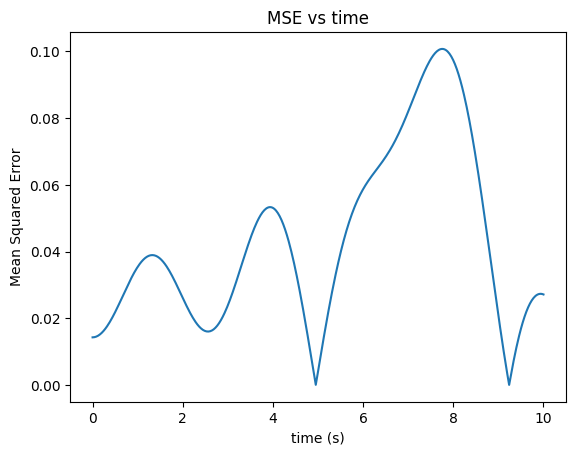

In [116]:
def Hamiltonian3(g_arr, t, n):
    qc = QuantumCircuit(n)
    for i in range(n-1):
        qc.h(i)
        qc.cx(i,i+1)
        qc.rz(2*g_arr[i]*t, i+1)
        qc.cx(i,i+1)
        qc.h(i)
    ham_op = qi.Operator(qc)
    return(ham_op.to_matrix())
n = 4
g_arr = np.random.rand(n)
times = np.linspace(0,10,500)
errors = []
for t in times:
    hamsim = Hamiltonian3(g_arr,t,n)
    #print("Hamiltonian Simulation", hamsim.round(5))
    #calculating actual Hamiltonian
    qc_placeholder_x = QuantumCircuit(1)
    qc_placeholder_x.x(0)
    qc2 = QuantumCircuit(n)
    for i in range(n-1):
        temp_x = qi.Operator(qc_placeholder_x).to_matrix()
        g_i_mat = temp_x * g_arr[i]
        Q,R = np.linalg.qr(g_i_mat)
        D = np.diag(np.diag(R))/np.abs(np.diag(R))
        U = Q@D
        u_op = qi.Operator(U)
        #print(u_op)
        qc2.append(u_op,[i])
        qc2.z(i+1)
    actual_zs = (qi.Operator(qc2)).to_matrix()
    actual_ham = sci.expm(-1j * actual_zs * time)
    #print("Actual Hamiltonian", actual_ham.round(5))
    error = np.abs(np.mean((actual_ham - hamsim)**2))
    errors.append(error)
plt.plot(times, errors)
plt.title("MSE vs time")
plt.xlabel("time (s)")
plt.ylabel("Mean Squared Error")

Some interesting insights from the MSE graph and various program runs:
 1) As n increases, MSE tends to decrease. This makes sense as there will be significantly more 0s in both of the larger matrices, significantly decreasing the MSE
 2) There are really strange, high degree polynomial shapes that model this function with many peaks and valleys. I really am not sure why, but I know the cyclic/sinusodial nature of e^ix must be playing some role
 3) There is no clear correlation between time and error - this may be a quirk of my implementation but I found that odd.